In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
emnist = pd.read_csv('datasets/emnist-byclass-train.csv')
print(emnist.shape)

(697931, 785)


In [3]:
emnist = emnist[emnist['35'] < 36]
print(emnist.shape)

(533992, 785)


In [4]:
x_data = emnist.drop('35', axis=1)
print(x_data.shape)

(533992, 784)


In [5]:
y_data = emnist['35']
printnt(y_data.shape)

(533992,)


In [50]:
from sklearn.utils import shuffle
x_data, y_data = shuffle(x_data, y_data)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400494, 784)
(133498, 784)
(400494,)
(133498,)


In [52]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400494, 784)
(133498, 784)
(400494,)
(133498,)


In [53]:
x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4d = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_train_4d.shape)
print(x_test_4d.shape)

(400494, 28, 28, 1)
(133498, 28, 28, 1)


In [54]:
x_train_normalize = x_train_4d / 255
x_test_normalize = x_test_4d / 255
print(x_train_normalize.shape)
print(x_test_normalize.shape)

(400494, 28, 28, 1)
(133498, 28, 28, 1)


In [55]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(400494, 36)
(133498, 36)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(36, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               225920    
__________

In [21]:
x_train_normalize = x_train_normalize[:len(x_train_normalize) // 10]
y_train_onehot = y_train_onehot[:len(y_train_onehot) // 10]
print(x_train_normalize.shape)
print(y_train_onehot.shape)

(40049, 28, 28, 1)
(40049, 36)


In [28]:
%%time
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x = x_train_normalize, y = y_train_onehot, validation_split = 0.2, epochs = 30, batch_size = 300, verbose = 2)

Train on 32039 samples, validate on 8010 samples
Epoch 1/30
 - 50s - loss: 1.5228 - acc: 0.5841 - val_loss: 0.5906 - val_acc: 0.8154
Epoch 2/30
 - 52s - loss: 0.6026 - acc: 0.8042 - val_loss: 0.4000 - val_acc: 0.8629
Epoch 3/30
 - 52s - loss: 0.4578 - acc: 0.8438 - val_loss: 0.3517 - val_acc: 0.8767
Epoch 4/30
 - 51s - loss: 0.3874 - acc: 0.8649 - val_loss: 0.3090 - val_acc: 0.8875
Epoch 5/30
 - 52s - loss: 0.3448 - acc: 0.8774 - val_loss: 0.2932 - val_acc: 0.8948
Epoch 6/30
 - 54s - loss: 0.3193 - acc: 0.8854 - val_loss: 0.2809 - val_acc: 0.8998
Epoch 7/30
 - 51s - loss: 0.2910 - acc: 0.8928 - val_loss: 0.2673 - val_acc: 0.9007
Epoch 8/30
 - 51s - loss: 0.2772 - acc: 0.8966 - val_loss: 0.2580 - val_acc: 0.9036
Epoch 9/30
 - 51s - loss: 0.2643 - acc: 0.9023 - val_loss: 0.2495 - val_acc: 0.9062
Epoch 10/30
 - 51s - loss: 0.2505 - acc: 0.9056 - val_loss: 0.2476 - val_acc: 0.9076
Epoch 11/30
 - 51s - loss: 0.2394 - acc: 0.9081 - val_loss: 0.2446 - val_acc: 0.9102
Epoch 12/30
 - 51s - loss

In [29]:
model.save('emnist.h5')
scores = model.evaluate(x_test_normalize, y_test_onehot)
print(scores)

133498/133498 [==============================] - 96s 716us/step
[0.23383185857677194, 0.9182384754792069]


In [30]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

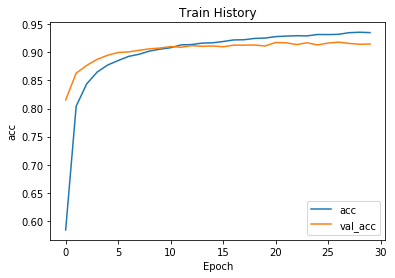

In [31]:
show_train_history(train_history, 'acc', 'val_acc')

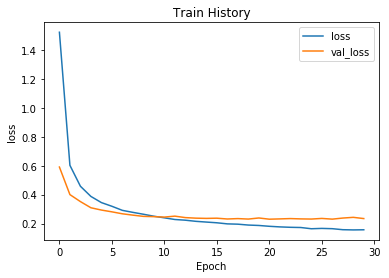

In [32]:
show_train_history(train_history, 'loss', 'val_loss')

In [33]:
def get_class(i):
    class_str = '0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'
    class_list = class_str.split()
    return class_list[i]

In [34]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 200)
    for i in range(num):
        ax = plt.subplot(100, 10, 1 + i)
        ax.imshow(images[idx])
        L = get_class(labels[idx])
        P = get_class(prediction[idx])
        title = 'L: %s\nP: %s' % (L, P)
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

In [56]:
x_test = x_test.reshape(len(x_test), 28, 28)
print(x_test.shape)

(133498, 28, 28)


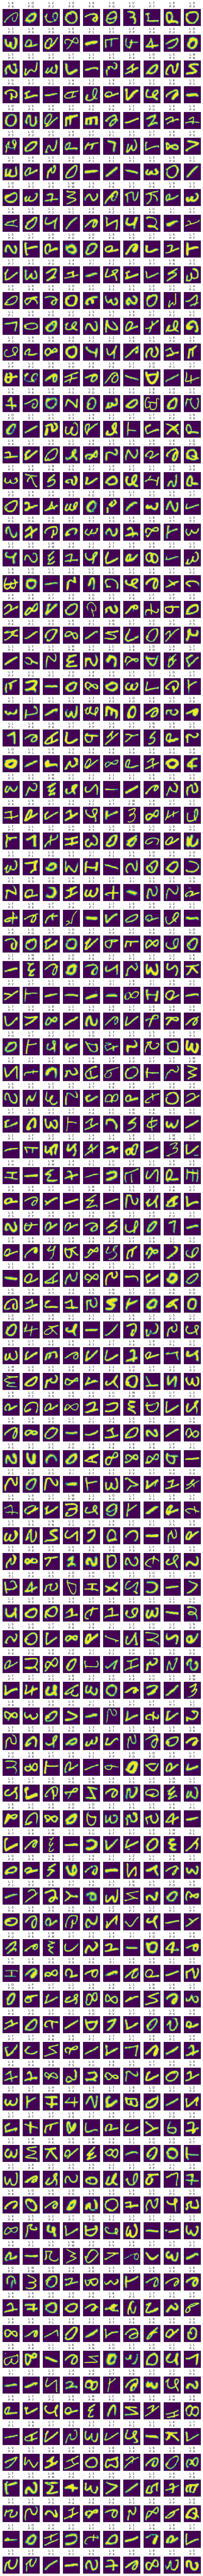

In [57]:
prediction = model.predict_classes(x_test_normalize)
plot_images_labels_prediction(x_test, y_test, prediction, 0, 1000)